## Examining correlations in data

In this exercise, we will examine further relationships in the WHR data, with a focus on correlations among variables.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
dfraw = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='Table2.1')

In [3]:
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = dfraw[cols_to_include].rename(renaming, axis=1)
df1517 = df[df.year.isin(range(2015,2018))]
df1517.head()

,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
7,Afghanistan,2015,3.98,0.55,0.34,7.47,0.53,51.69,0.39,0.09,0.88
8,Afghanistan,2016,4.22,0.56,0.35,7.46,0.56,52.02,0.52,0.06,0.79
9,Afghanistan,2017,2.66,0.50,0.37,7.46,0.49,52.34,0.43,-0.11,0.95
17,Albania,2015,4.61,0.69,0.35,9.30,0.64,68.69,0.70,-0.09,0.88
18,Albania,2016,4.51,0.68,0.32,9.34,0.64,68.87,0.73,-0.02,0.90


Compute pairwise correlations among all the WHR variables by using Pandas'  ```corr``` method (since correlations are symmetric, i.e., corr(x,y) = corr(y,x), the matrix of correlation values is also symmetric about the diagonal).

In [35]:
correlations = df1517.corr()
type(correlations)

pandas.core.frame.DataFrame

Visualization of the correlation matrix is useful with a heatmap.  

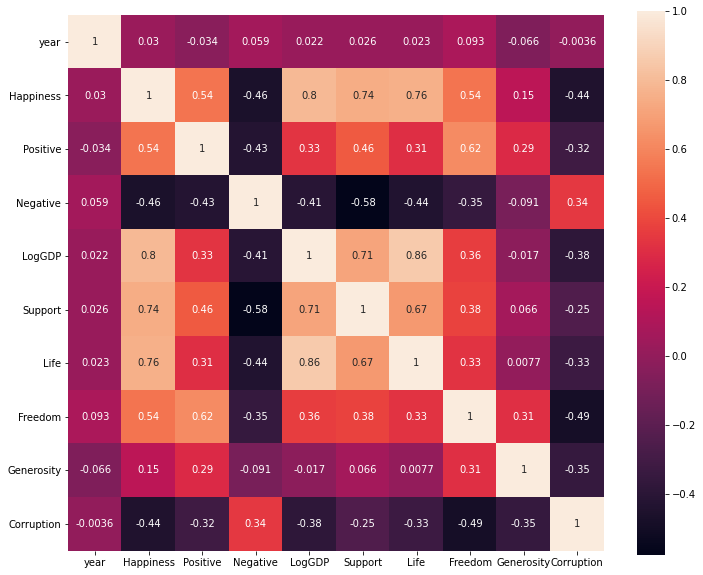

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(correlations, annot=True, square=True)

LogGDP, Support, and Life all showed reasonably strong positive correlation with Happiness, and Corruption showed negative correlation. We also see information about the correlation of each variable with year.  The fact that no variable shows particularly strong correlation (positive or negative) with year indicates that the data are approximately constant over time, i.e., there are no strong temporal trends that are apparent.


Use ```regplot``` (short for regression plot) to present a scatterplot of a pair of variables and estimate a linear regression of the data.  

The linear fit to the data is indicated by the line, and the shaded area around the line that indicates the confidence interval.  

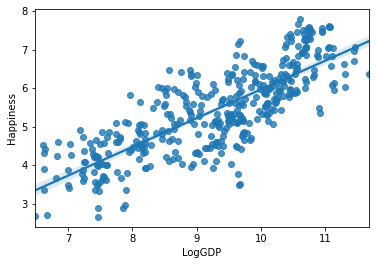

In [41]:
sns.regplot(x='LogGDP', y='Happiness', data = df1517)

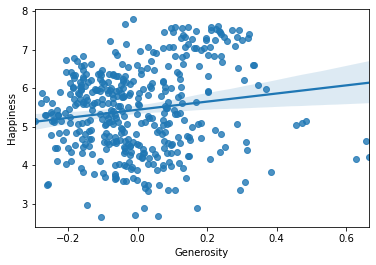

In [42]:
sns.regplot(x = 'Generosity', y= 'Happiness', data=df1517)